In [1]:
#Importing Required Libraries
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

#To ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print("Libraries Import Successfully")

Libraries Import Successfully


In [2]:
df_mnist=pd.read_csv('train.csv')  
print("Shape of Dataset : ",df_mnist.shape)

Shape of Dataset :  (42000, 785)


In [3]:
df_mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Separate Features & Targets columns
Columns=df_mnist.columns   
features=Columns.tolist()  

Feature=features[1:]  
Target=features[0]  

In [7]:
df_mnist.head(25)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
mnist_label=df_mnist[Target]  
mnist_data=df_mnist[Feature]
 
print(mnist_label.shape)  
  
print(mnist_data.shape)

(42000,)
(42000, 784)


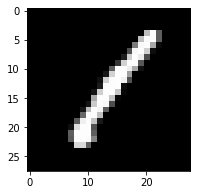

1


In [15]:
#Plotting Digit
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))  
#we will try only to plot first row  
idx=0
#as the data is 784 dimensions we need to bring it back to 28x28 format in order to plot  
grid_data=mnist_data.iloc[idx].to_numpy().reshape(28,28) # reshape from 1d to 2d pixel array  
plt.imshow(grid_data,interpolation="none",cmap = "gray")  
plt.show()  
print(mnist_label[idx])

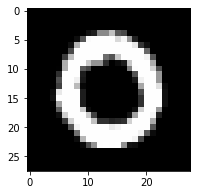

0


In [8]:
#Plotting Digit
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))  
#we will try only to plot first row  
idx=1
#as the data is 784 dimensions we need to bring it back to 28x28 format in order to plot  
grid_data=mnist_data.iloc[idx].to_numpy().reshape(28,28) # reshape from 1d to 2d pixel array  
plt.imshow(grid_data,interpolation="none",cmap = "gray")  
plt.show()  
print(mnist_label[idx])

In [9]:
#Splitting Data into Train & Test set
X=mnist_data.loc[:,Feature].values  
y=mnist_label.loc[:].values 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=0)

print('X_train shape',X_train.shape)  
print('X_test shape',X_test.shape)   
print('y_train shape',y_train.shape)  
print('y_test shape',y_test.shape)

X_train shape (29400, 784)
X_test shape (12600, 784)
y_train shape (29400,)
y_test shape (12600,)


In [16]:
#Standardization
sc=StandardScaler()
#fit only on Training data  
sc.fit(X_train)   
#Apply the transformation to both test & train data   
X_train=sc.fit_transform(X_train)   
X_test=sc.fit_transform(X_test)

#X_test=sc.fit_transform

# Principal Component Analysis

### Decide Number of Components

The number of components in PCA can be decided after checking variance with respect to no_components. Let’s see some of common ways of checking the components.

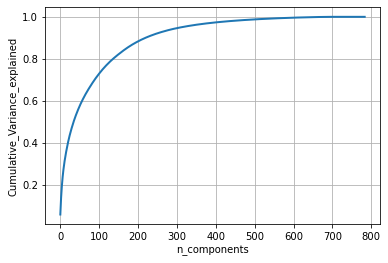

In [20]:
#Create an Object for PCA
pca=PCA()  

# Number of components to keep. if n_components is not set all components are kept:
pca.n_components=784  

#Fitting the Data to PCA
pca_data=pca.fit_transform(X_train)

percentage_var_explained = pca.explained_variance_ratio_;  
cum_var_explained=np.cumsum(percentage_var_explained)
#plot PCA spectrum   
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var_explained,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  
plt.show()

From the graph we can see that if we take around 200 components then we can cover around 90% Variance .

### Explained_Variance cumsum Table

In this case we can prepare a table with no_components vs. cumulative sum of variance.


In [61]:
pca=PCA()  
pca.n_components=784  
pca_data=pca.fit_transform(X_train)  
# look at explainded variance  of PCA components 
exp_var_cumsum=pd.Series(np.round(pca.explained_variance_ratio_.cumsum(),4)*100)  
for index,var in enumerate(exp_var_cumsum):  
    print('if n_components= %d,   variance=%f' %(index,np.round(var,3)))

if n_components= 0,   variance=5.850000
if n_components= 1,   variance=10.070000
if n_components= 2,   variance=13.920000
if n_components= 3,   variance=16.920000
if n_components= 4,   variance=19.520000
if n_components= 5,   variance=21.790000
if n_components= 6,   variance=23.800000
if n_components= 7,   variance=25.600000
if n_components= 8,   variance=27.210000
if n_components= 9,   variance=28.660000
if n_components= 10,   variance=30.060000
if n_components= 11,   variance=31.310000
if n_components= 12,   variance=32.470000
if n_components= 13,   variance=33.610000
if n_components= 14,   variance=34.690000
if n_components= 15,   variance=35.720000
if n_components= 16,   variance=36.690000
if n_components= 17,   variance=37.650000
if n_components= 18,   variance=38.580000
if n_components= 19,   variance=39.490000
if n_components= 20,   variance=40.350000
if n_components= 21,   variance=41.190000
if n_components= 22,   variance=41.990000
if n_components= 23,   variance=42.760000
if 

From above we can see that n_components=219 explains 90.01% of variance

### Passing %Variance as Input parameter to PCA()

In this case the no_components will be decided as per the target Variance %.The variance % is passed as input parameter to PCA.

In [26]:
#Let's say you would like to explain 90% variance  
pca=PCA(.90)  
pca.fit(X_train)  
print('Number of components to explain 90% Variance is',pca.n_components_)

Number of components to explain 90% Variance is 220


### Plot in 2-D Space

In [22]:
pca=PCA(n_components=2) 
pca_data_vis=pca.fit_transform(X_train) 
print('shape of PCA data',pca_data_vis.shape)

shape of PCA data (29400, 2)


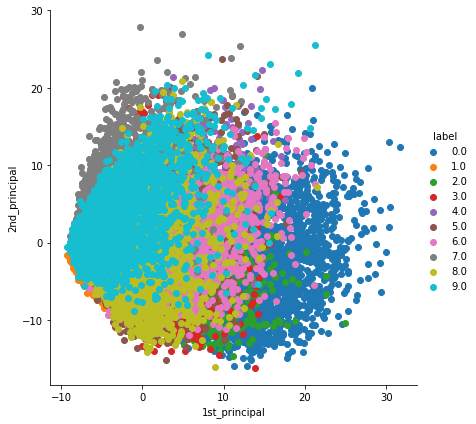

In [23]:
import seaborn as sns
pca_data_vis = np.vstack((pca_data_vis.T,y_train)).T
pca_vis_df = pd.DataFrame(data=pca_data_vis,columns=("1st_principal","2nd_principal","label"))  
sns.FacetGrid(pca_vis_df,hue="label",size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()


## PCA & Logistic Regression

From above we have already seen how to different number of componenets to achieve the target explained variance. Let’s say we try to achieve 90% of variance.

In [27]:
from sklearn.decomposition import PCA

pca=PCA(.90) 
pca.fit(X_train) 
X_train=pca.transform(X_train) 
X_test =pca.transform(X_test)
from sklearn.linear_model  import LogisticRegression  
LogReg=LogisticRegression(class_weight='balanced')  
LogReg.fit(X_train,y_train)
y_pred=LogReg.predict(X_test)

### Verification of Model

In [28]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report, accuracy_score,f1_score
print('Accuracy:',accuracy_score(y_test,y_pred))  
print('F1 score:',f1_score(y_test,y_pred,average='weighted'))   
print('Recall:',recall_score(y_test,y_pred,average='weighted'))   
print('Precision:',precision_score(y_test,y_pred,average='weighted'))  
print('\n clasification report:\n',classification_report(y_test,y_pred))  
print('\n confussion matrix:\n',confusion_matrix(y_test,y_pred))

Accuracy: 0.9202380952380952
F1 score: 0.9201837596004236
Recall: 0.9202380952380952
Precision: 0.9202768703446413

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1242
           1       0.96      0.97      0.97      1429
           2       0.91      0.90      0.91      1276
           3       0.91      0.90      0.91      1298
           4       0.93      0.92      0.93      1236
           5       0.89      0.89      0.89      1119
           6       0.92      0.96      0.94      1243
           7       0.94      0.92      0.93      1334
           8       0.88      0.88      0.88      1204
           9       0.88      0.90      0.89      1219

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600


 confussion matrix:
 [[1191    0    9    2    2    5   22    1    8    2]
 [   0 1386   14    7    1